Gaussian distribution
====

*Hydrology and hydraulic COnstruction Class*

----

#### riccardo rigon 

and many other sources:
---
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html 

https://docs.scipy.org/doc/numpy/reference/routines.random.html

http://hamelg.blogspot.it/2015/11/python-for-data-analysis-part-22.html

The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean, $\mu$) and spread (standard deviation, $\sigma$).

$f(x) = \frac{1}{\sqrt{2\pi} \sigma} e^{-(x-\mu)^2/2 \pi \sigma^2}$

The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.
The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.
The scipy nickname for the normal distribution is norm. 

In [1]:
import numpy as np #We use numpy and matplotlib here

In [2]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [3]:
abs(mu - np.mean(s)) < 0.01

True

C:\Users\anzo5\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


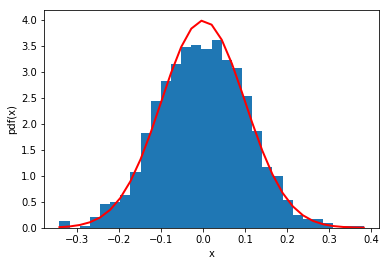

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
count, bins, ignored = plt.hist(s, 30, normed = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

C:\Users\anzo5\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


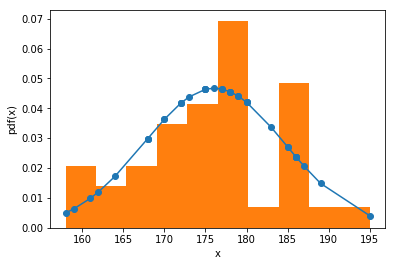

In [5]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted([186, 176, 158, 180, 186, 168, 168, 164, 178, 170, 189, 195, 172,
     187, 180, 186, 185, 168, 179, 178, 183, 179, 170, 175, 186, 159,
     161, 178, 175, 185, 175, 162, 173, 172, 177, 175, 172, 177, 180])  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,normed=True)      #use this to draw histogram of your data

plt.xlabel('x')
plt.ylabel('pdf(x)')

pl.show()  

In [6]:

prob_under_minus1 = stats.norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - stats.norm.cdf(x= 1,  
                                loc = 0,               
                                scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


Text(1.4, 0.03, '0.159')

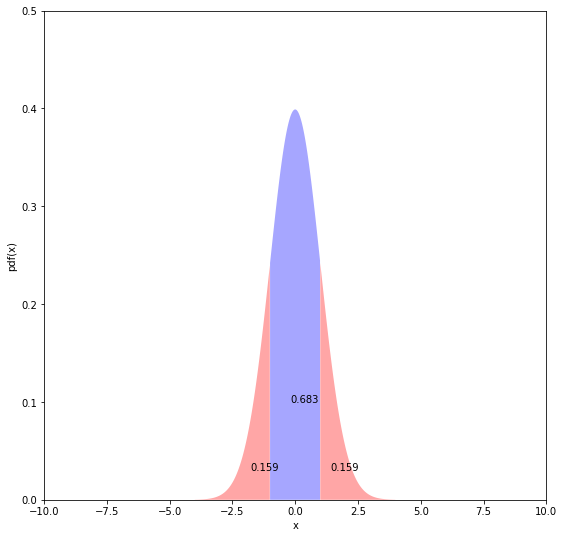

In [7]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.xlim(-10,10)
plt.ylim(0,0.5)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3))

*Note: This lesson uses some plotting code we did not cover in the plotting lesson in order to make plots for explanatory purposes.
The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean.
Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():

In [8]:
print( stats.norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print( stats.norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import numpy as np

In [10]:
x=np.linspace(-2,2, num=100)
dn={'index':x,'pdf':norm.pdf(x, 0, 1),'cdf':norm.cdf(x,0,1)};

In [11]:
dt=pd.DataFrame(dn)

In [12]:
dt=dt.set_index('index')

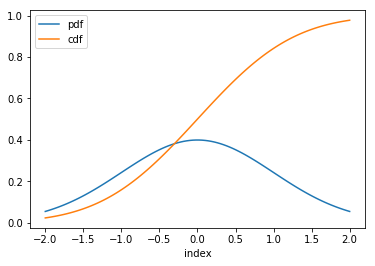

In [13]:
dt.plot()